**AIM:**:****EXPLORATORY  DATA ANALYSIS(EDA) ON UFO SIGHTINGS USING PYTHON.****
![](https://alien-ufo-sightings.com/wp-content/uploads/2018/05/alien-spaceships.jpg)

For performing EXPLANATORY DATA ANALYSIS(EDA) on any data(using python),we have to
first import essential libraries like
* **PANDAS**(used for reading data flies)
* **MATPLOTLIB**(for ploting the graphs)
* **SEABORN**(for visualizing the data)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Reading a csv file using pandas

In [26]:
data=pd.read_csv("../input/ufo-sightings/scrubbed.csv",low_memory = False)

> Size of the data set
* output : (rows, coloumns)

In [27]:
data.shape

(80332, 11)

> Reading first five lines of data file

In [28]:
data.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


> Reading last five lines of the dataset


In [29]:
data.tail()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
80327,9/9/2013 21:15,nashville,tn,us,light,600,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.1658333,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.6136111,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200,hour,Napa UFO&#44,9/30/2013,38.2972222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.9011111,-77.265556
80331,9/9/2013 23:00,edmond,ok,us,cigar,1020,17 minutes,2 witnesses 2 miles apart&#44 Red &amp; White...,9/30/2013,35.6527778,-97.477778


> Identifying the null values
Among the data the most important labels are:
* State
* Country
* Datetime


In [30]:
data.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
date posted                0
latitude                   0
longitude                  0
dtype: int64

> ITS NOT GOOD TO HAVE MISSING VALUES IN A DATASET,WE HAVE MORE NUMBER OF ZEROS IN COUNTRY COLOUMN WHICH IS THE MOST IMPORTANT THING TO BE CONSIDERED IN OUR DATA
* **LET US REPLACE THOSE MISSING VALUES**
* **I'AM USING 'ffill'(forward fill) METHOD WE CAN  USE 'bfill' (backward fill) METHOD ALSO**

In [31]:
new_data = data['country'].fillna(method = 'bfill')
new_data.head()

0    us
1    gb
2    gb
3    us
4    us
Name: country, dtype: object

> *Now for countries there is no problem with the missing values,let us do the same for states*

In [32]:
new_data = data['state'].fillna(method = 'bfill')

> Before performing EDA on the data we should remove some unwanted labels,this processs is called **Data Cleaning**

In [33]:
new_data = data.drop(['comments','duration (seconds)','duration (hours/min)'], axis=1)
col = new_data.shape


> Now our dataset is somewhat shortened as we removed unwanted coloumns,as we can see coloumns are reduced from 11 to 7

In [34]:
country = new_data['country'].nunique()
print("There are {} unique conuntries,where UFO'S are arrived.".format(country))

There are 5 unique conuntries,where UFO'S are arrived.


> **STRANGE!!!!! from the dataset of more than 80,000 UFO'S records there are only 5 unique countries.....**

In [35]:
new_data['country'].unique()

array(['us', nan, 'gb', 'ca', 'au', 'de'], dtype=object)

> **From the above array of countries:**
> * "US" stands for UNITED STATES OF AMERICA
> * "CA" stands for CANADA
> * "GB" stands for UNITED KINGDOM
> * "DE" stands for GERMANY
> * "AU" stands for AUSTRALLIA

# COUNTRIES

> Let us findout which country more number of UFO'S spotted

In [36]:
Ccount = new_data['country'].value_counts()
list_country = []
for i in Ccount:
    list_country.append(i)
print(Ccount)

us    65114
ca     3000
gb     1905
au      538
de      105
Name: country, dtype: int64


![](http:th.bing.com/th/id/R.db115ac7aa9ae0c562ce6de1fd0b54ca?rik=DWNjtHB5E%2fnPzg&riu=http%3a%2f%2fpixel.nymag.com%2fimgs%2fdaily%2fintelligencer%2f2015%2f02%2f23%2f20-white-house-ufo.w529.h352.2x.jpg&ehk=5vP22UReD7ea5Vryz4hEgJpSTzvMGbSwenDgppGK7dk%3d&risl=&pid=ImgRaw&r=0)**MORE THAN 95% UFO'S ARE RPORTED IN AMERICAN CONTINENTS , maybe aliens like USA the most than other countries.**

# STATES

> **Let's findout in which states the ufo's spotted**

In [37]:
new_data['state'].value_counts()


ca    9655
wa    4268
fl    4200
tx    3677
ny    3219
      ... 
nf      25
nt      20
pe      17
yt      13
yk       7
Name: state, Length: 67, dtype: int64

From the above data it is observed that:
* Califorinia(ca) has more no.of ufo cases in the world i.e there are more than 9,500 ufo's arrival reported there.
* Second place goes to Washington DC.
* Third is florida.

> Nothing new in above observation, as the more no.of reports are from USA,absolutely there will be maximum sates from USA **.**

# SHAPES

In [38]:
print("There are {} unique shapes in UFO'S." .format(new_data['shape'].nunique()))
new_data['shape'].unique()

There are 29 unique shapes in UFO'S.


array(['cylinder', 'light', 'circle', 'sphere', 'disk', 'fireball',
       'unknown', 'oval', 'other', 'cigar', 'rectangle', 'chevron',
       'triangle', 'formation', nan, 'delta', 'changing', 'egg',
       'diamond', 'flash', 'teardrop', 'cone', 'cross', 'pyramid',
       'round', 'crescent', 'flare', 'hexagon', 'dome', 'changed'],
      dtype=object)

29 shapes means somewhat more....

In [39]:
Scount=new_data['shape'].value_counts()
Scount


light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
round            2
crescent         2
flare            1
pyramid          1
dome             1
changed          1
hexagon          1
Name: shape, dtype: int64

![](http://cdn.mos.cms.futurecdn.net/EtspHqk8vDuZ2mbHbVYJ3-1200-80.jpg)> **From the above information it is clear that many of them actuall never seen an ufo.... as they saw something white-light,fireball etc.And we also have many 'unknown' and 'other' shapes.**
> Most of the indentified shapes of the UFO's are :
> 1. Triangle
> 2. Circle
> 3. Sphere
> 4. Disk
> 5. Oval
> **In most of the cases they maybe circular objects as all the shapes like circle,sphere,oval..are somewhat  similar**

# DATA VISUALIZATION

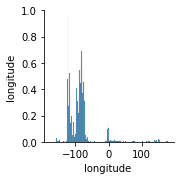

In [40]:
sns.pairplot(new_data, kind="hist")
plt.show()


**We can see we get only one pair plot,as there are only two numerical values in our dataset**

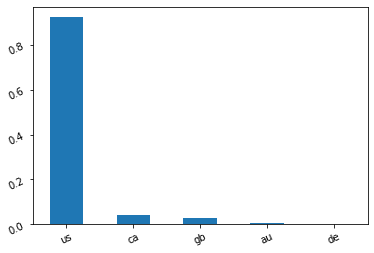

In [41]:
prob = new_data["country"].value_counts(normalize=True)
prob.plot(kind='bar')
plt.xticks(
rotation=25)
plt.yticks(rotation = 25)
plt.show()

*we can see that the majority of UFO sihtings are from USA and second ,third......places are very less as compared to USA.*

Text(0.5, 0, '')

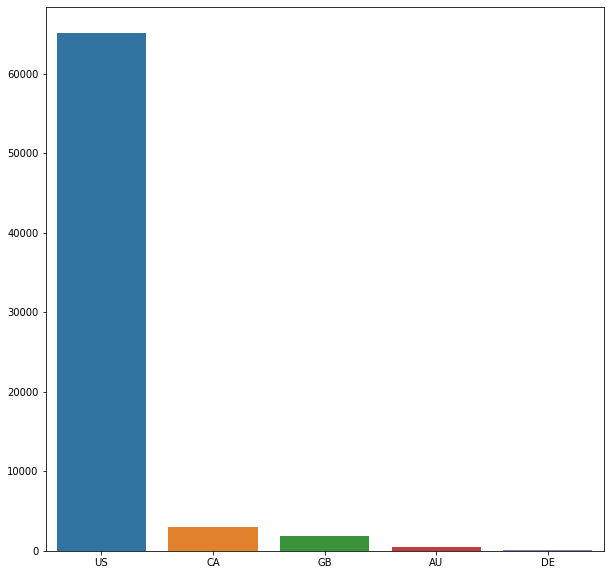

In [42]:
c = ['US','CA','GB','AU','DE']
plt.figure(figsize = (10,10))
sns.barplot(x=c,y=list_country)
plt.xlabel("")

It is now more clear than the before garph,we can see US has 70,000 UFO sightings(approx),CALIFORNIA has 4000(approx),GREAT BRITAN has 2000(approx),AUSTRAILLIA has 1500(approx),and GERMANY(DE) has very few UFO sightings(few in hundreds).

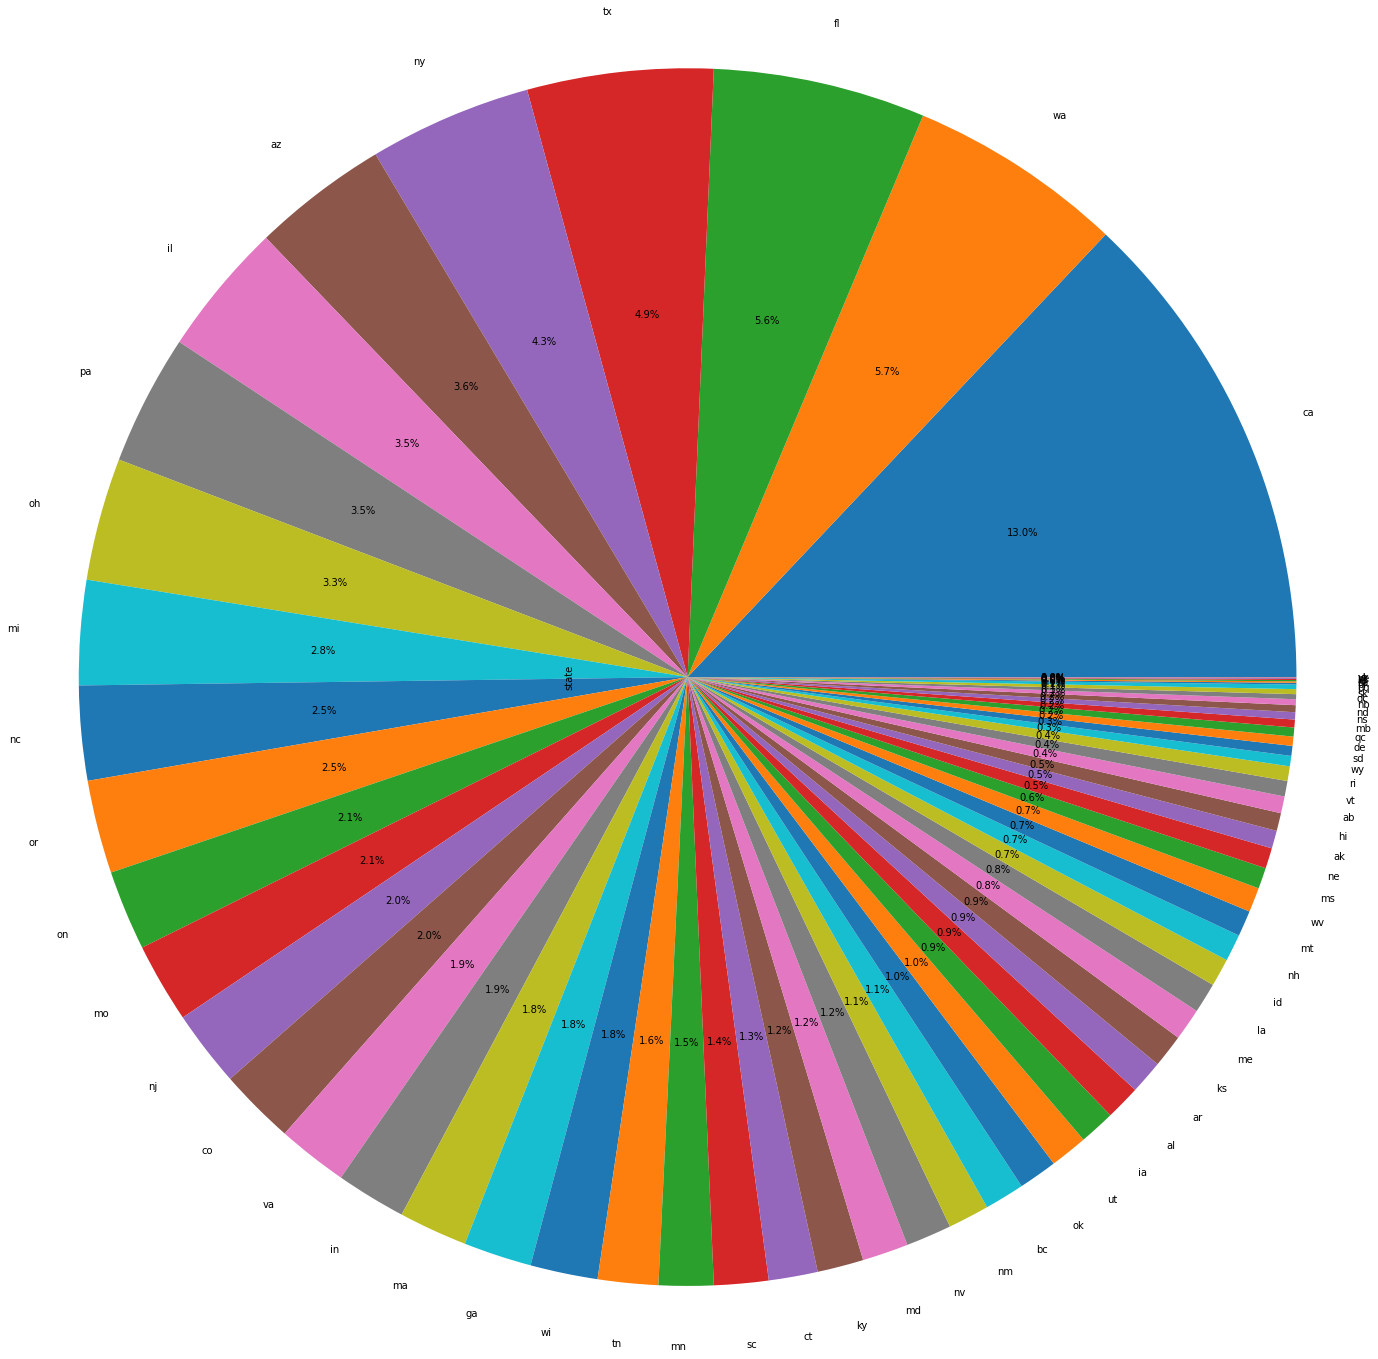

In [43]:
prob = new_data["state"].value_counts(normalize=True)
prob.plot(kind='pie',radius = 7,autopct ='%0.1f%%')
plt.xticks(rotation=0)
plt.yticks(rotation = 0)
plt.show()

The most of the UFO sightings are from California,Washington,Florida and Texas.

<AxesSubplot:>

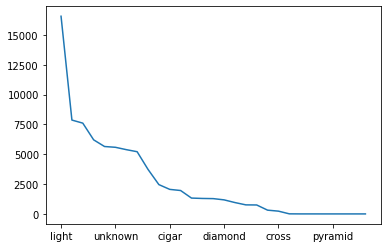

In [44]:
Scount=new_data['shape'].value_counts().plot()
Scount

From the above Line Graph it is clear that in most of the cases people didn't indetified any symmetrical object,they just saw only light.we cannot say that they are UFO'S by just seeing a light in creepy areas....so we may need not to consider them as UFO sightings.

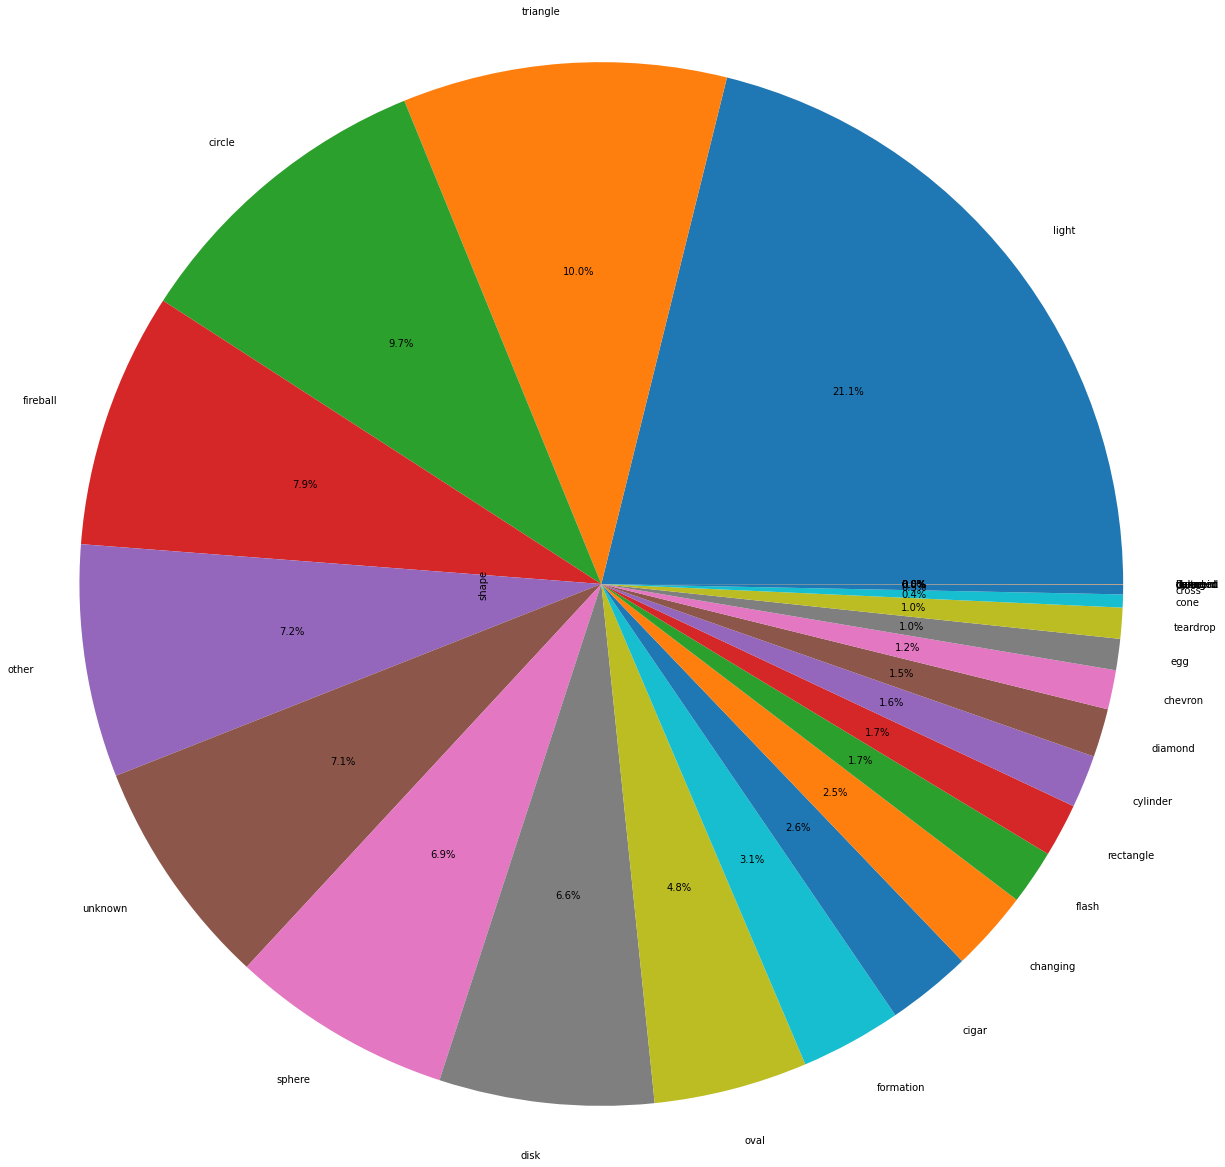

In [45]:
prob = new_data["shape"].value_counts(normalize=True)
prob.plot(kind='pie',radius = 6,autopct ='%0.1f%%')
plt.xticks(rotation=0)
plt.yticks(rotation = 0)
plt.show()

Now we can clearly understand, the majority of the shapes are Triangle(10.0%),circle(9.7%),fireball(7.9%),sphere(6.9%) and so on.....

# *Conclusion*

UFO stands for UNIDENTIFIED FLYING OBJECT
<br>
Our main aim is to findout where these ufo's had arrived and how that ufo's looks like.
<br>
From the abrevation of ufo itself we can see that they are unidentified flying objects,means these ufo's are not yet identified i.e they just appear and disappear in short time.<br>
In most of the cases people are just able to identify the shape but not the exact image of ufo's.In most of the cases victims only identified a white light and some of them idntified shapes like Trianle,Sphere,Circle....etc.
<br>
Coming to our analysis i.e Exploratory Data Analysis(EDA),<br>
we have 80331 ufo  sightings till 2013.Eighty thousand ufo reports means not a small thing,<br>But the very strange thing about ufo sightings is more than 70,000 ufo sihtings are from USA.<br>
And more than 96% are from American continent.<br>
Strange thing is there is not even atleast one ufo sighting from INDIA,maybe they are afraid of INDIA😜.<br>
<img src = "https://th.bing.com/th/id/R.4a753ac3bb42adbd226c806c6ee23aab?rik=yF1G7gDXmNLCPA&riu=http%3a%2f%2fwww.tsiosophy.com%2fwp%2fwp-content%2fuploads%2f2011%2f04%2fWorldmap_LandAndPolitical.jpg&ehk=BpRyBZNl0rtM9kIdvZ0tFy9nFHoFxtBrvmPsW%2bQZxmM%3d&risl=1&pid=ImgRaw&r=0" alt = "World Map" width = 300px height = 250 px >
<br>
From the world map we can see,two continents are placed somewhat away from the rest of the continents,they are:<br>
North America <br>
South America<br>
This may be a reason that American continents have more no.of ufo sightings.
<br>
Even though there are large number of ufo sightings,most of the world not belive the exisistence of ALIENS,as there is no strong and  detailed evidences.<br> 
<br><br><br>
<H3>References<h3>
    The dataset used in this project :  <a href= "https://www.kaggle.com/NUFORC/ufo-sightings">Click Here</a>
    
    some websites I refered during the project:
*     https://www.w3schools.com/
*     https://www.geeksforgeeks.org/
*     https://stackoverflow.com/
    
    